# Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.insert(1, 'src/')
import acquire

import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_excel('data/nyc_data.xlsx')

## Shape, size, and data types

In [3]:
print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns')

There are 65,597 rows and 21 columns


In [4]:
df.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,11.0,0.0,11.0,1750.0,6500.0,1900.0,2,C4,3750000,2017-04-03
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,...,24.0,1.0,25.0,2650.0,9960.0,1910.0,2,C7,5235000,2017-07-11
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,...,5.0,0.0,5.0,2139.0,4416.0,1900.0,2,C2,0,2017-06-16
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2,C2,6625000,2017-07-19
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,,...,11.0,1.0,12.0,2388.0,8045.0,1900.0,2,C7,7675000,2017-11-13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65597 entries, 0 to 65596
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   BOROUGH
                               65597 non-null  int64         
 1   NEIGHBORHOOD
                          65597 non-null  object        
 2   BUILDING CLASS CATEGORY
               65597 non-null  object        
 3   TAX CLASS AS OF FINAL ROLL 18/19       65418 non-null  object        
 4   BLOCK
                                 65597 non-null  int64         
 5   LOT
                                   65597 non-null  int64         
 6   EASE-MENT
                             18642 non-null  object        
 7   BUILDING CLASS AS OF FINAL ROLL 18/19  65418 non-null  object        
 8   ADDRESS
                               65597 non-null  object        
 9   APARTMENT NUMBER
                      40376 non-null  object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH\n,65597.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00
BLOCK\n,65597.0,1.118167e+03,5.302200e+02,2.0,771.0,1171.0,1456.0,2.250000e+03
LOT\n,65597.0,7.556837e+02,9.194700e+02,1.0,29.0,1003.0,1203.0,9.116000e+03
ZIP CODE\n,65597.0,1.000154e+04,5.331730e+02,0.0,10013.0,10022.0,10028.0,1.046300e+04
RESIDENTIAL UNITS\n,52157.0,2.520716e+00,4.212848e+01,0.0,0.0,1.0,1.0,8.764000e+03
COMMERCIAL UNITS\n,47199.0,5.105405e-01,6.828389e+00,-16.0,0.0,0.0,0.0,5.700000e+02
TOTAL UNITS\n,52595.0,3.011465e+00,4.271716e+01,0.0,0.0,1.0,1.0,8.812000e+03
LAND SQUARE FEET\n,46761.0,2.037477e+03,1.579207e+04,0.0,0.0,0.0,0.0,2.675000e+06
GROSS SQUARE FEET\n,46761.0,5.693456e+03,6.535126e+04,0.0,0.0,0.0,703.0,8.942176e+06
YEAR BUILT\n,62182.0,1.804539e+03,5.184475e+02,0.0,1915.0,1941.0,1979.0,2.020000e+03


In [7]:
df.describe(exclude='number', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
NEIGHBORHOOD\n,65597,39,UPPER EAST SIDE (59-79),6592,NaT,NaT,NaT,NaT,NaT,NaT
BUILDING CLASS CATEGORY\n,65597,87,13 CONDOS - ELEVATOR APARTMENTS,18866,NaT,NaT,NaT,NaT,NaT,NaT
TAX CLASS AS OF FINAL ROLL 18/19,65418,12,2,40435,NaT,NaT,NaT,NaT,NaT,NaT
EASE-MENT\n,18642,1,,18642,NaT,NaT,NaT,NaT,NaT,NaT
BUILDING CLASS AS OF FINAL ROLL 18/19,65418,151,R4,25917,NaT,NaT,NaT,NaT,NaT,NaT
ADDRESS\n,65597,47327,1 WEST END AVENUE,210,NaT,NaT,NaT,NaT,NaT,NaT
APARTMENT NUMBER\n,40376,5985,,10399,NaT,NaT,NaT,NaT,NaT,NaT
BUILDING CLASS AT TIME OF SALE\n,65597,150,R4,26532,NaT,NaT,NaT,NaT,NaT,NaT
SALE DATE\n,65597,NaN,NaN,NaN,2018-10-25 11:43:23.588655872,2017-01-01,2017-11-16,2018-10-29,2019-10-03,2020-10-30


## Missing Values

In [8]:
acquire.pct_nulls_per_column(df)

Percentage of values missing per column
---------------------------------------
EASE-MENT\n                              71.58%
APARTMENT NUMBER\n                       38.45%
GROSS SQUARE FEET\n                      28.71%
LAND SQUARE FEET\n                       28.71%
COMMERCIAL UNITS\n                       28.05%
RESIDENTIAL UNITS\n                      20.49%
TOTAL UNITS\n                            19.82%
YEAR BUILT\n                              5.21%
TAX CLASS AS OF FINAL ROLL 18/19          0.27%
BUILDING CLASS AS OF FINAL ROLL 18/19     0.27%
SALE DATE\n                               0.00%
LOT\n                                     0.00%
NEIGHBORHOOD\n                            0.00%
BUILDING CLASS CATEGORY\n                 0.00%
BLOCK\n                                   0.00%
ZIP CODE\n                                0.00%
ADDRESS\n                                 0.00%
SALE PRICE\n                              0.00%
TAX CLASS AT TIME OF SALE\n               0.00%
BUILDING

## Distributions

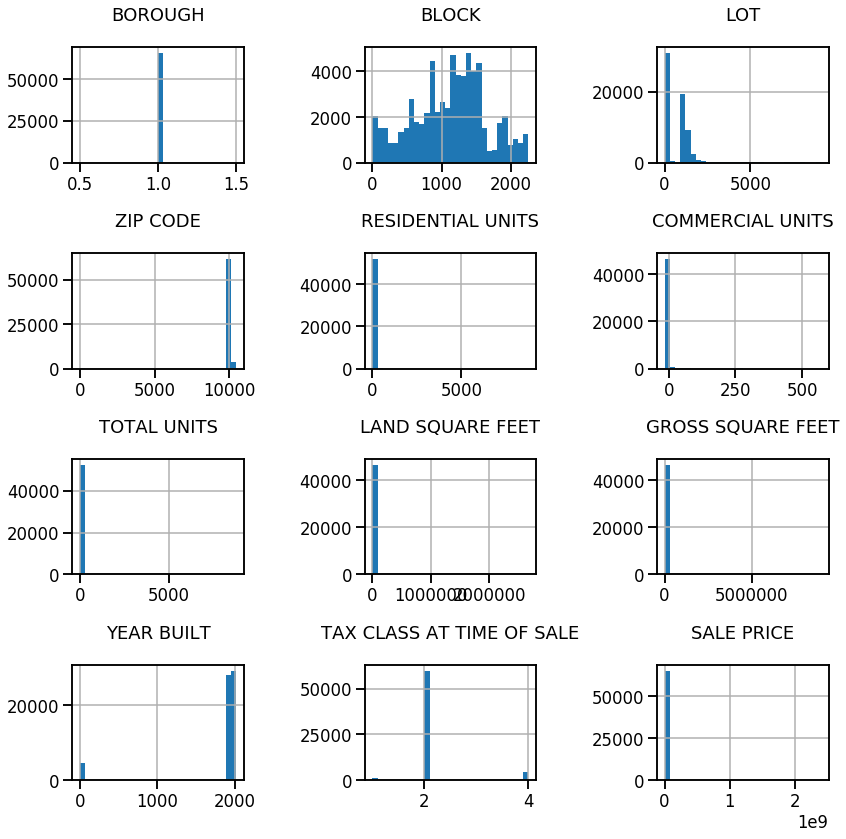

In [9]:
sns.set_context('talk')
df.hist(bins=30, figsize=(12, 12))

plt.tight_layout()
plt.show()

# Data Preparation

In [10]:
# Rename columns
df.columns = df.columns.str.replace('\n', '')
df.columns = df.columns.str.lower()
df.columns = [column.replace(' ', '_') for column in df.columns]

In [11]:
df.drop(columns = ['tax_class_as_of_final_roll_18/19',
                   'ease-ment',
                   'building_class_as_of_final_roll_18/19',
                   'apartment_number',
                   'residential_units',
                   'commercial_units'],
       inplace=True)

In [12]:
df = df.dropna()

# Exploration

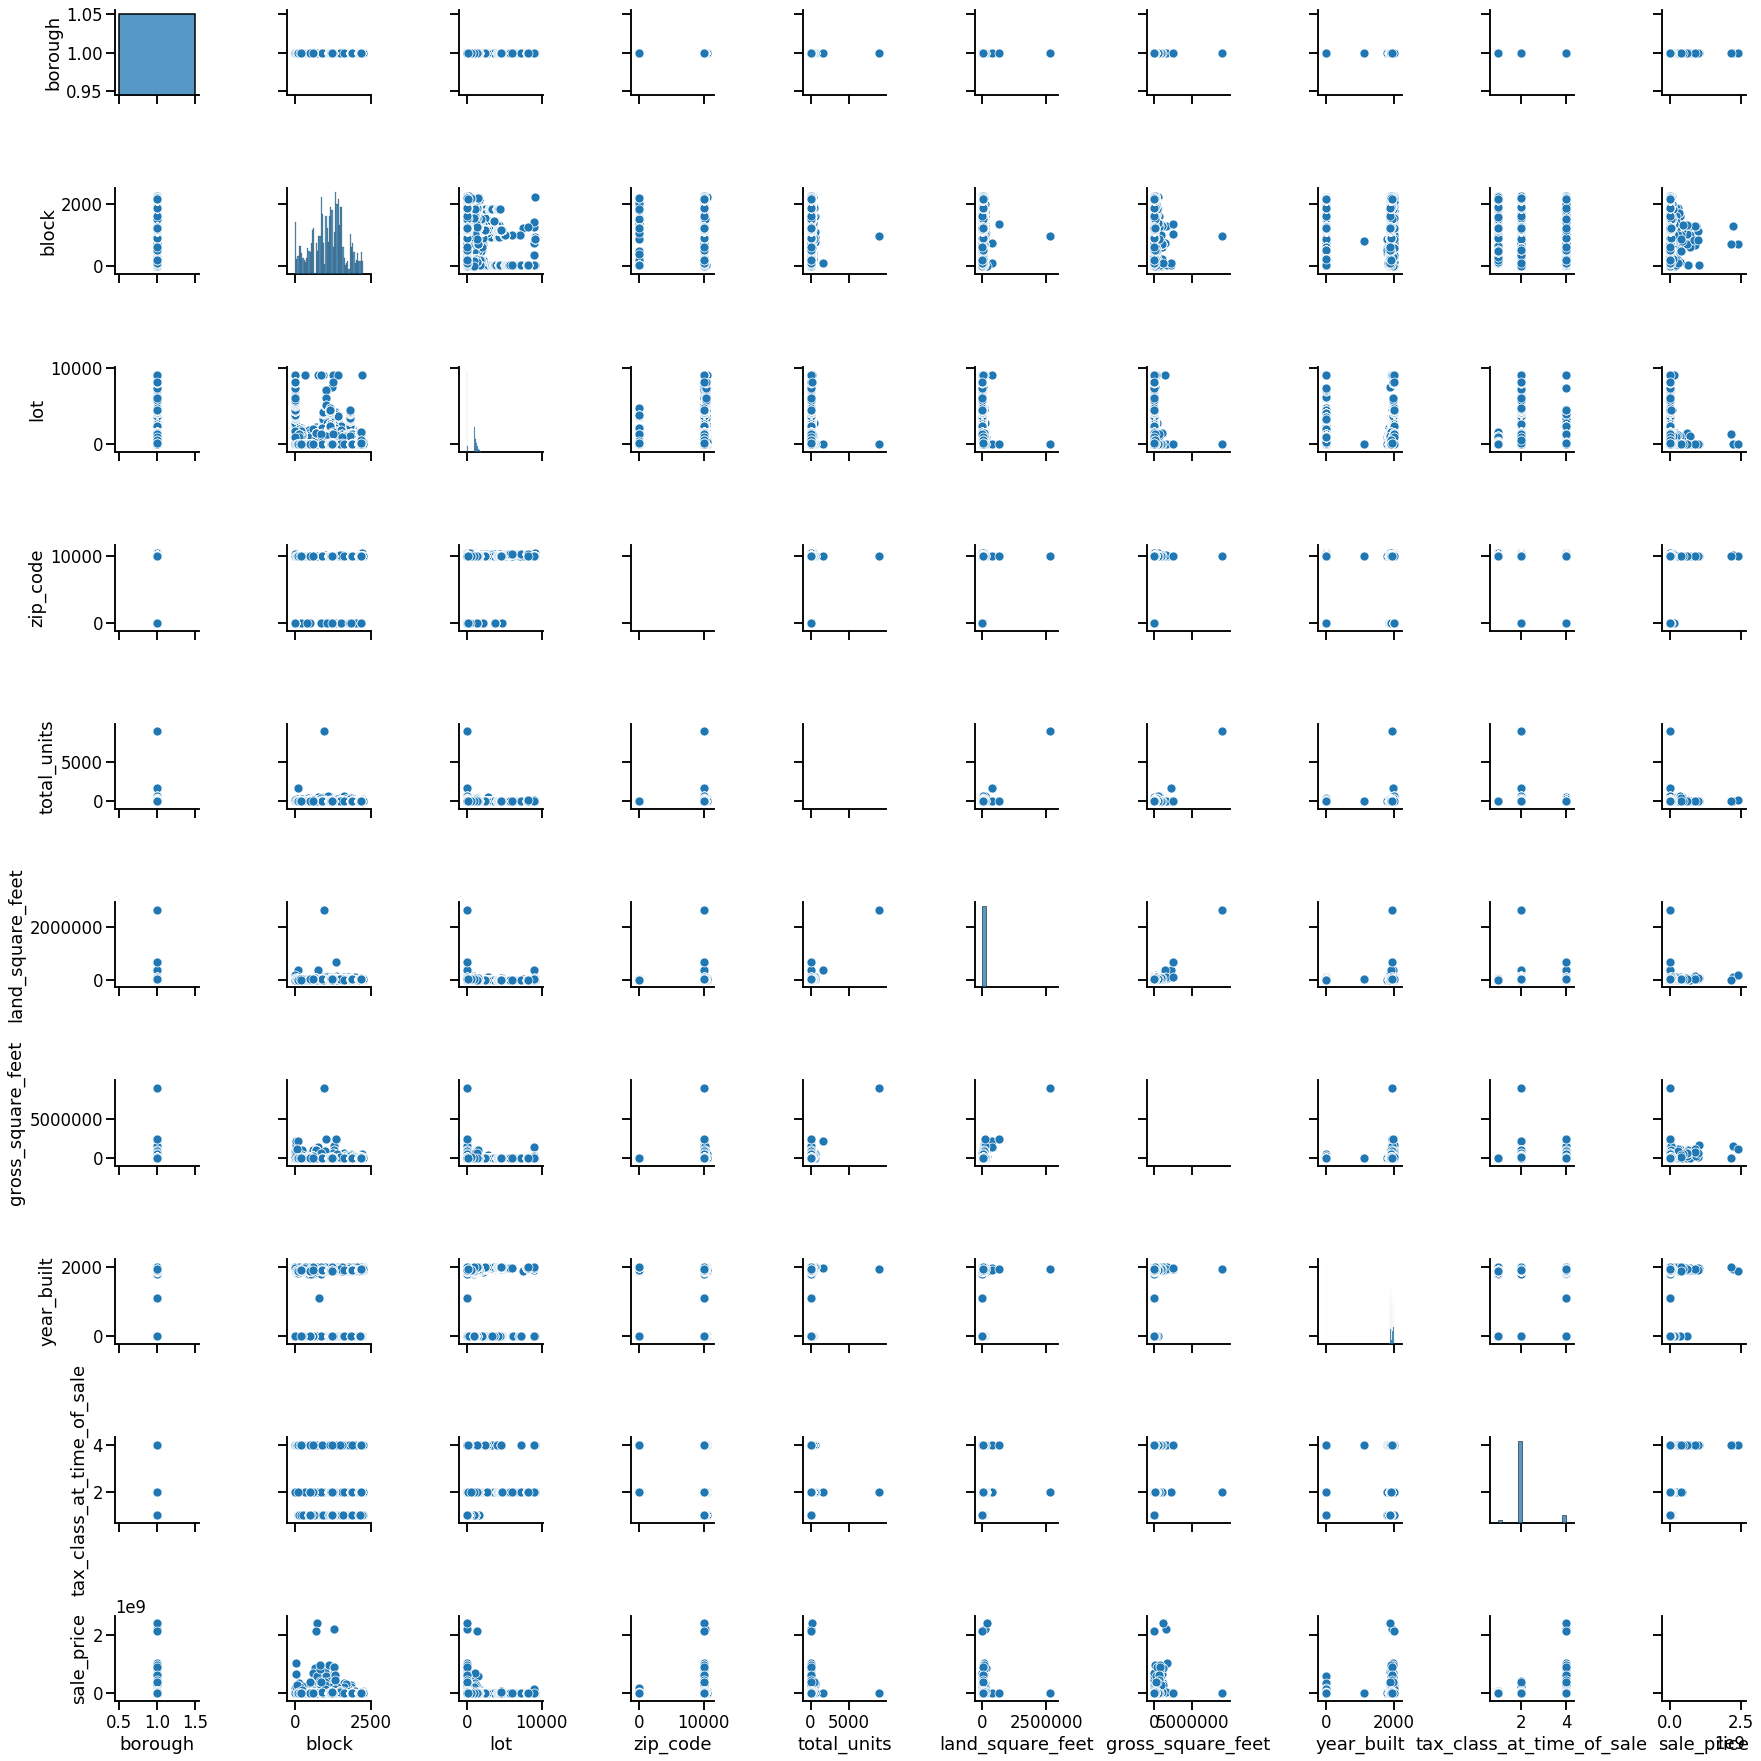

In [18]:
sns.pairplot(df);

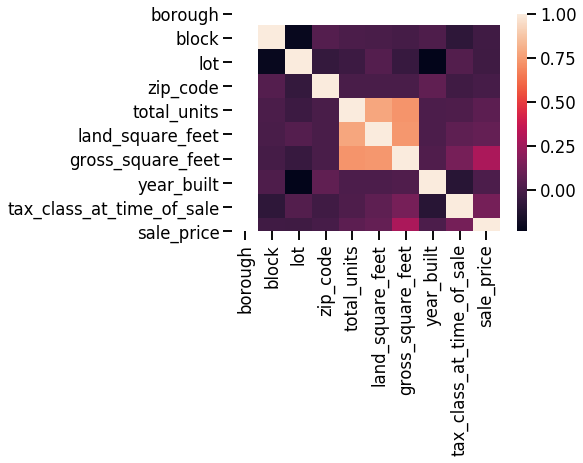

In [19]:
sns.heatmap(df.corr());

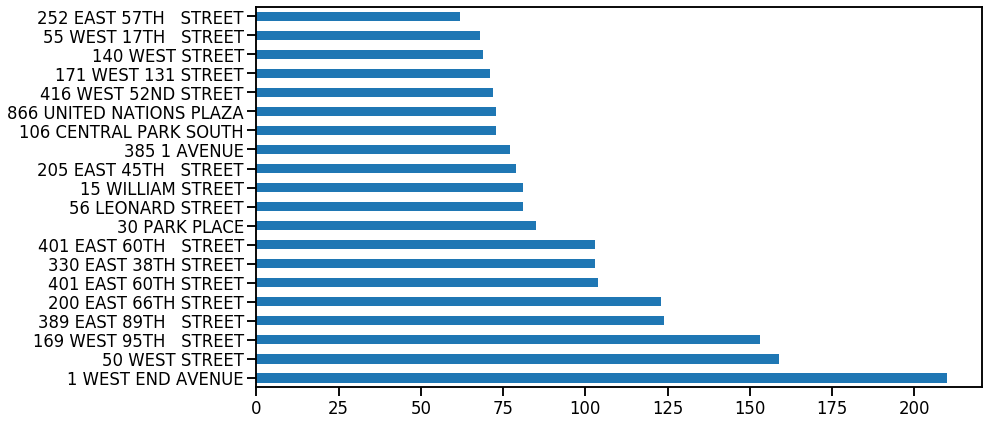

In [13]:
sns.set_context('talk')

df.address.str.strip().value_counts().nlargest(20).plot.barh(figsize=(13, 7));

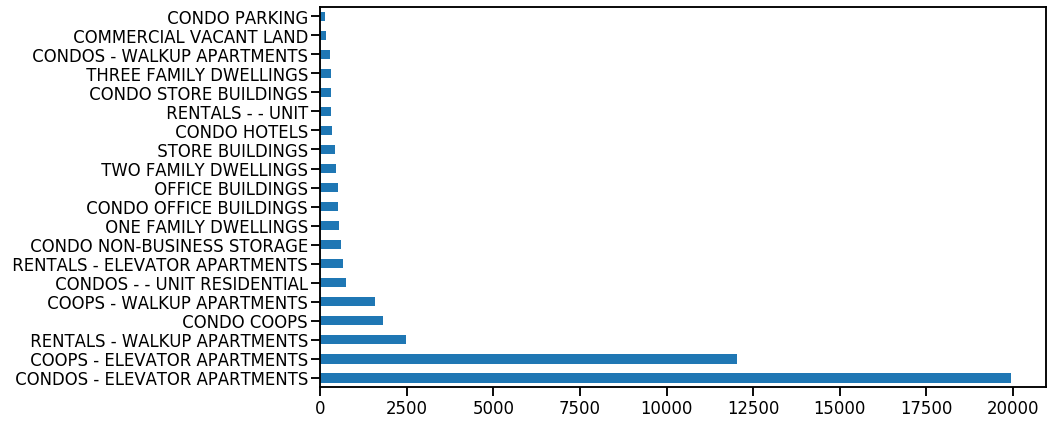

In [14]:
df.building_class_category.str.strip().replace(r'\d+', '', regex=True).value_counts().nlargest(20).plot.barh(figsize=(13, 7));

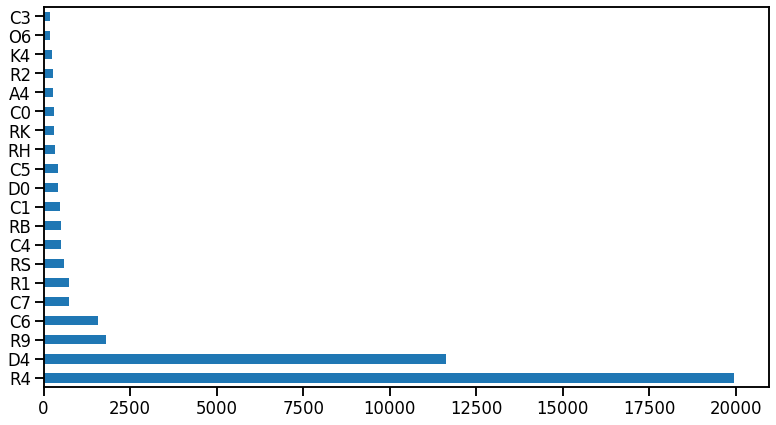

In [15]:
df.building_class_at_time_of_sale.value_counts().nlargest(20).plot.barh(figsize=(13, 7));

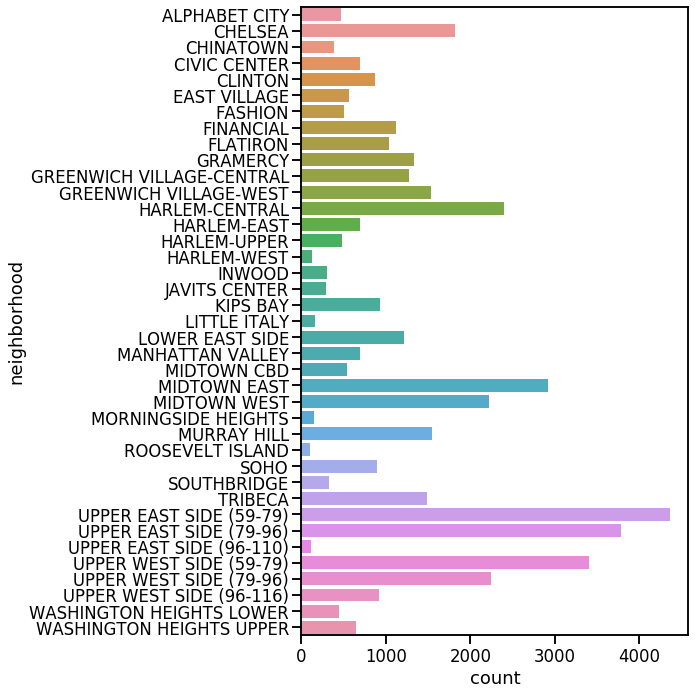

In [16]:
sns.set_context('talk')
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='neighborhood')
plt.tight_layout();

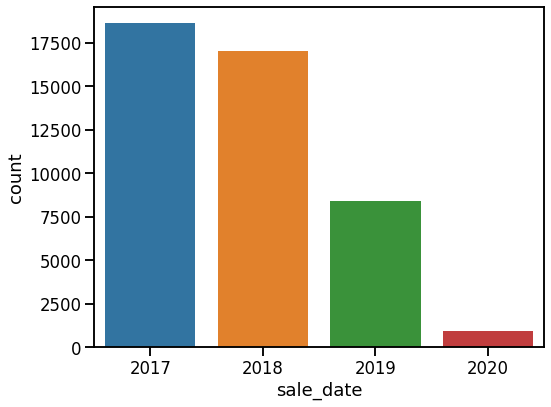

In [17]:
sns.set_context('talk')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.sale_date.dt.year)
plt.tight_layout();